In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the Data

In [68]:
dfx = pd.read_csv("linearX.csv") ## dfx is a dataframe
dfy = pd.read_csv("linearY.csv")

print(type(dfx))
print(type(dfx.values)) ## dfx.values is a numpy array

print(dfx.values.shape) ## (99,1)
print(dfy.values.shape) ## (99,1)
var = dfx.values.shape[1]
print(var)
x = dfx.values.reshape(-1,) ## (99,)
y = dfy.values.reshape(-1,) ## (99,)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(99, 1)
(99, 1)
1


## Visualizing the Data

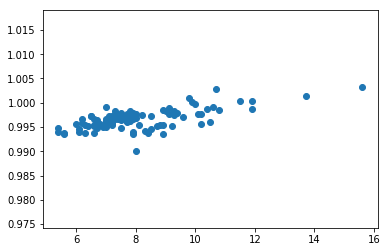

In [69]:
plt.scatter(x,y)
plt.show()

## Normalizing the data

In [70]:
x_old = x
x = (x - x.mean())/x.std()

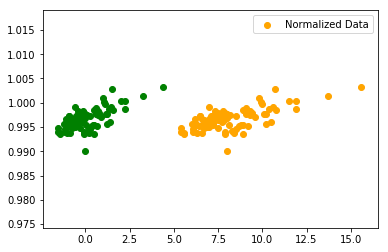

In [71]:
plt.scatter(x,y,color='green')
plt.scatter(x_old,y,color='orange',label="Normalized Data")
plt.legend()
plt.show()

## Applying Gradient Descent Algorithm

In [72]:
def hypothesis(x,theta):
    return theta[1]*x + theta[0]

def gradient(x,theta):
    m = x.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        grad[0] += (hypothesis(x[i],theta) - y[i])
        grad[1] += (hypothesis(x[i],theta) - y[i])*x[i]
    
    return grad

def gradDescent(x,y,learningRate=0.01):

    itr = 1
    theta = np.array([-2.0,0.0])
    while(itr<=100):
        theta = theta - learningRate*gradient(x,theta)
        itr +=1
    
    
    return theta


In [73]:
new_theta = gradDescent(x,y)

In [74]:
print(new_theta)

[0.99663414 0.00135794]


In [81]:
x = np.array([1]).hstack(x)
x

AttributeError: 'numpy.ndarray' object has no attribute 'hstack'

In [75]:
def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

    

In [76]:
final_theta, error_list,theta_list = gradientDescent(x,y)

[0.996554  0.0013579]


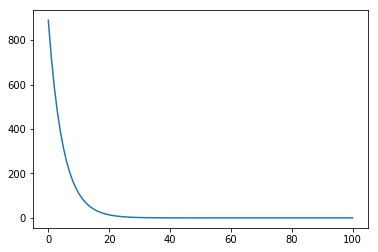

In [77]:
print(final_theta)
plt.plot(error_list)
plt.show()